In [2]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

np.set_printoptions(formatter={'all': lambda x: '%.4f' % x})

In [3]:
def gradient(fn: Callable, p: np.ndarray, delta) -> np.ndarray:
    fn_dx = lambda fn, p, delta: (fn(p[0] + delta, p[1]) - fn(p[0] - delta, p[1])) / (2 * delta)
    fn_dy = lambda fn, p, delta: (fn(p[0], p[1] + delta) - fn(p[0], p[1] - delta)) / (2 * delta)
    return np.array([fn_dx(fn, p, delta), fn_dy(fn, p, delta)])

def calc_alpha(fn, x, d, delta):
    grad_fn = lambda x, y: gradient(fn, np.array([x, y]), delta)
    result = line_search(fn, grad_fn, x, grad_fn(*x))
    return result[0]

def newton_dfp(
    fn: Callable,
    point: np.ndarray,
    delta: float = 0.1,
    error: float = 0.001,
    max_iters: int = 1000,
    debug: bool = False
):
    x = point
    H = np.eye(len(x))
    epsilon = np.finfo(float).eps

    for iter in range(max_iters):
        grad = gradient(fn, x, delta)

        if debug:
            print(f'------------ iter {iter} --------------')
            print(f'gradient({x}) = {grad}')
        
        if np.sum(grad) == 0 or max_iters == 1:
            return { 'point': x, 'iters': iter + 1 }

        d_iter = np.matmul(-H, np.transpose(grad))
        alpha_iter = calc_alpha(fn, x, np.transpose(d_iter), delta)
        print(alpha_iter)
        dx_iter = alpha_iter * d_iter

        if debug:
            print(f'd_iter = {d_iter}')
            print(f'alpha_iter = {alpha_iter}')
            print(f'dx_iter = {dx_iter}')

        x = x + dx_iter

        delta_grad = gradient(fn, x, delta) - grad  # type: ignore
        
        H = H + (delta_grad * dx_iter) / (grad * dx_iter) - (np.matmul(H * grad, H * grad)) / (np.dot(np.dot(np.transpose(grad), H), delta_grad))

        if debug: 
            print(f'x = {x}')
            print(f'delta_grad = {delta_grad}')
            print(f'H = {H}')
            print(f'------------ END iter {iter} --------------')
    
    return { 'point': x, 'iters': max_iters }

In [8]:
x0 = np.array([-1, 1])
def gradient(fn: Callable, p: np.ndarray, delta) -> np.ndarray:
    fn_dx = lambda fn, p, delta: (fn([p[0] + delta, p[1]]) - fn([p[0] - delta, p[1]])) / (2 * delta)
    fn_dy = lambda fn, p, delta: (fn([p[0], p[1] + delta]) - fn([p[0], p[1] - delta])) / (2 * delta)
    return np.array([fn_dx(fn, p, delta), fn_dy(fn, p, delta)])

fn1 = lambda x: 190 * (np.sqrt(x[0]**2 + (x[1] + 1)**2) - 1)**2 -(20 * x[0] + 40 * x[1])
grad_fn = lambda x: gradient(fn1, x, 0.1)

line_search(fn1, grad_fn, x0, grad_fn(x0))

(None, 13, 0, None, 270.29416855008, None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


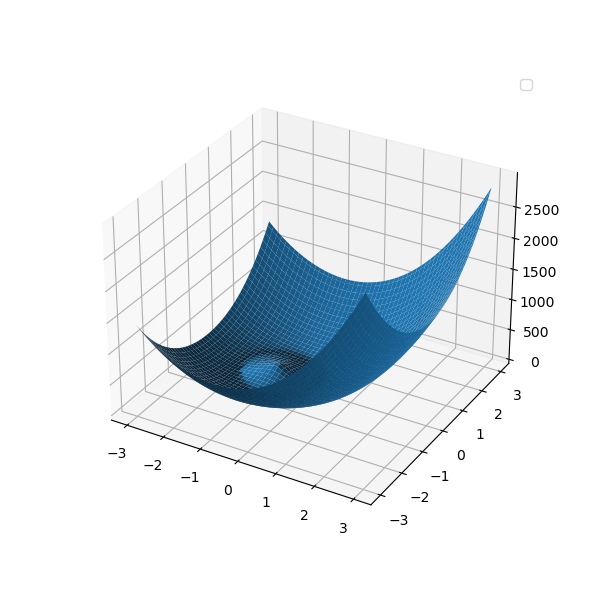

In [5]:
# %matplotlib widget
# fn1 = lambda x, y : 100*(np.sqrt(x**2+(y+1)**2)-1)**2 + 90*(np.sqrt(x**2+(y+1)**2)-1)**2 -(20*x+40*y)
# x = np.linspace(-3, 3, 100)
# y = np.linspace(-3, 3, 100)
# x_m, y_m = np.meshgrid(x, y)
# z = np.array([fn1(xi, yj) for xi in x for yj in y]).reshape((100, 100))
# fig = plt.figure(figsize=(6, 6))
# ax = plt.axes(projection='3d')
# ax.plot_surface(x_m, y_m, z)  # type: ignore
# plt.legend()
# plt.show()

In [6]:
fn1 = lambda x, y: 190 * (np.sqrt(x**2 + (y + 1)**2) - 1)**2 -(20 * x + 40 * y)

x = np.array([3, 3])

newton_dfp(
    fn1,
    x,
    error = 0.001,
    max_iters = 1000,
    debug = True
)

------------ iter 0 --------------
gradient([3.0000 3.0000]) = [892.0292 1176.0219]


TypeError: <lambda>() missing 1 required positional argument: 'y'

In [ ]:
# fn2 = lambda x, y : (x - 3) ** 2 + (y - 5) ** 2
# x = np.array([7, 9])

# levenberg_marquardt(
#     fn2,
#     x,
#     e1 = 0.001,
#     e2 = 0.002,
#     alpha = 0.001,
#     delta = 10
# )

In [ ]:
# fn1 = lambda x, y: -25 * x + 110 * y
# x = np.array([7, 9])
# levenberg_marquardt(
#     fn1,
#     x,
#     e1 = 0.001,
#     e2 = 0.002,
#     alpha = 0.001,
#     delta = 10
# )

In [ ]:
# fn3 = lambda x, y :190 * (np.sqrt(x ** 2 + (y + 1) ** 2) - 1) ** 2 - (20 * x + 40 * y)
# x = np.array([7, 9])

# levenberg_marquardt(
#     fn3,
#     x,
#     e1 = 0.001,
#     e2 = 0.002,
#     alpha = 0.001,
#     delta = 10
# )